In [505]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [506]:
tickers = ['XLK', 'XLV', 'XLF', 'XLE', 'XLP', 'XLI', 'XLC', 'XLB', 'XLU', 'XLRE', 'XLY']
start_date = '2015-01-01'
end_date = '2025-01-01'

# Periodi eventi (Pandemia) (Guerra)
covid_start = pd.Timestamp('2020-01-10')
covid_end   = pd.Timestamp('2023-05-05')

war_start   = pd.Timestamp('2022-02-24')
war_end     = pd.Timestamp.today().normalize()  # fino ad oggi


In [507]:
war_end

Timestamp('2025-11-22 00:00:00')

In [508]:
dats = yf.download(tickers, period='10y', auto_adjust=True, group_by='column')


[*********************100%***********************]  11 of 11 completed


In [509]:
dats

Price           Close                                                \
Ticker            XLB         XLC        XLE        XLF         XLI   
Date                                                                  
2015-11-23  37.240067         NaN  44.865326  16.522268   46.013180   
2015-11-24  37.550476         NaN  45.824158  16.475191   45.938019   
2015-11-25  37.313583         NaN  45.451286  16.488646   45.938019   
2015-11-27  37.264568         NaN  45.125004  16.528994   46.021542   
2015-11-30  37.354427         NaN  45.291458  16.515545   45.720856   
...               ...         ...        ...        ...         ...   
2025-11-17  85.449997  111.180000  90.339996  51.450001  150.520004   
2025-11-18  85.519997  111.809998  91.059998  51.369999  149.850006   
2025-11-19  85.739998  111.190002  89.879997  51.560001  150.350006   
2025-11-20  84.459999  109.970001  88.860001  51.110001  147.830002   
2025-11-21  86.349998  111.900002  89.419998  51.669998  149.630005   

Price                                                                ...  \
Ticker             XLK        XLP       XLRE        XLU         XLV  ...   
Date                                                                 ...   
2015-11-23   39.122971  37.932156  21.920458  31.168827   60.400345  ...   
2015-11-24   39.131870  38.031761  21.587255  31.125324   60.586582  ...   
2015-11-25   39.007225  38.131374  21.587255  30.936811   60.916782  ...   
2015-11-27   39.096264  38.276939  21.750303  30.994820   61.035343  ...   
2015-11-30   39.140781  37.863213  21.799931  31.045582   60.205627  ...   
...                ...        ...        ...        ...         ...  ...   
2025-11-17  283.640015  76.769997  40.680000  89.559998  151.699997  ...   
2025-11-18  279.029999  77.099998  40.830002  89.220001  152.589996  ...   
2025-11-19  280.970001  76.510002  40.509998  88.470001  152.330002  ...   
2025-11-20  272.149994  77.059998  40.369999  88.019997  151.419998  ...   
2025-11-21  273.200012  77.900002  40.900002  88.150002  154.610001  ...   

Price          Volume                                                    \
Ticker            XLC       XLE       XLF       XLI       XLK       XLP   
Date                                                                      
2015-11-23        NaN  16407300  31828859   9956000   7227100   5316600   
2015-11-24        NaN  18943100  35916887  15131400  11303400   9786000   
2015-11-25        NaN  11100600  24226080   6406800   6576600   5599000   
2015-11-27        NaN   8376400  23191055   4454500   3800700   2712600   
2015-11-30        NaN  17605300  30361138  11017800  17025600  10355200   
...               ...       ...       ...       ...       ...       ...   
2025-11-17  4582300.0  18723700  70048500  15294100  12337700  13887100   
2025-11-18  8726100.0  17419700  66043600  19820200  18373800  16840000   
2025-11-19  4416800.0  20531400  46003900  12575500  13834400  15122100   
2025-11-20  7385400.0  20815000  70096400  27790800  28275900  21590200   
2025-11-21  7535400.0  19657600  68930600  20982900  22478100  22214800   

Price                                              
Ticker         XLRE       XLU       XLV       XLY  
Date                                               
2015-11-23     2400  11897000  10362700   4172000  
2015-11-24     2500   8791700   7174700   4545400  
2015-11-25        0   7678200   4594400   3703200  
2015-11-27        0   3980300   2658000   2282600  
2015-11-30     1600  11373000   8846100   8647000  
...             ...       ...       ...       ...  
2025-11-17  5861900  12100700  17516500  10116800  
2025-11-18  6634200  12579400  24494200  13528700  
2025-11-19  7201800  12547800  17352600   7956100  
2025-11-20  7477000  12771600  25278500  12462200  
2025-11-21  7858600  14293800  25522800   9506600  

[2515 rows x 55 columns]

In [510]:
if isinstance(dats.columns, pd.MultiIndex):
    print('primo if')
    if 'Close' in dats.columns.get_level_values(0):
        print('siamo qua')
        close = dats['Close'].copy()

primo if
siamo qua


In [511]:
close

Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2015-11-23,37.240067,NaN,44.865326,16.522268,46.013180,39.122971,37.932156,21.920458,31.168827,60.400345,73.053734
2015-11-24,37.550476,NaN,45.824158,16.475191,45.938019,39.131870,38.031761,21.587255,31.125324,60.586582,72.901367
2015-11-25,37.313583,NaN,45.451286,16.488646,45.938019,39.007225,38.131374,21.587255,30.936811,60.916782,73.268753
2015-11-27,37.264568,NaN,45.125004,16.528994,46.021542,39.096264,38.276939,21.750303,30.994820,61.035343,72.999962
2015-11-30,37.354427,NaN,45.291458,16.515545,45.720856,39.140781,37.863213,21.799931,31.045582,60.205627,72.381706
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,85.449997,111.180000,90.339996,51.450001,150.520004,283.640015,76.769997,40.680000,89.559998,151.699997,228.720001
2025-11-18,85.519997,111.809998,91.059998,51.369999,149.850006,279.029999,77.099998,40.830002,89.220001,152.589996,224.500000
2025-11-19,85.739998,111.190002,89.879997,51.560001,150.350006,280.970001,76.510002,40.509998,88.470001,152.330002,224.509995


In [512]:

_open = dats['Open'] if isinstance(dats.columns, pd.MultiIndex) else dats[['Open']]
_close = dats['Close'] if isinstance(dats.columns, pd.MultiIndex) else dats[['Close']]

In [513]:
px=close

In [514]:
def log_returns(px: pd.DataFrame) -> pd.DataFrame:
    px = px.sort_index()
    rets = np.log(px / px.shift(1))
    return rets.dropna(how='all')

In [515]:
rets = log_returns(px)

In [516]:
print(rets)

Ticker           XLB       XLC       XLE       XLF       XLI       XLK  \
Date                                                                     
2015-11-24  0.008301       NaN  0.021146 -0.002853 -0.001635  0.000227   
2015-11-25 -0.006329       NaN -0.008170  0.000816  0.000000 -0.003190   
2015-11-27 -0.001314       NaN -0.007205  0.002444  0.001817  0.002280   
2015-11-30  0.002408       NaN  0.003682 -0.000814 -0.006555  0.001138   
2015-12-01  0.006973       NaN  0.007908  0.010934  0.004739  0.008832   
...              ...       ...       ...       ...       ...       ...   
2025-11-17 -0.015330 -0.001348 -0.018426 -0.019250 -0.009850 -0.015775   
2025-11-18  0.000819  0.005650  0.007938 -0.001556 -0.004461 -0.016387   
2025-11-19  0.002569 -0.005561 -0.013043  0.003692  0.003331  0.006929   
2025-11-20 -0.015041 -0.011033 -0.011413 -0.008766 -0.016903 -0.031895   
2025-11-21  0.022131  0.017398  0.006282  0.010897  0.012103  0.003851   

Ticker           XLP      XLRE       

In [517]:
def annualized_volatility(rets: pd.DataFrame, periods_per_year = 252) -> pd.Series:
    return rets.std(skipna=True) * np.sqrt(periods_per_year)

In [518]:
vol = annualized_volatility(rets)
print(vol)

Ticker
XLB     0.208639
XLC     0.227437
XLE     0.300742
XLF     0.224373
XLI     0.199479
XLK     0.242586
XLP     0.147198
XLRE    0.207748
XLU     0.191977
XLV     0.167048
XLY     0.220473
dtype: float64


In [519]:
def drawdown_series(px: pd.DataFrame) -> pd.DataFrame:
    cummax = px.cummax()
    dd = px / cummax - 1.0
    return dd

In [520]:
dd = drawdown_series(px)

In [521]:
print(dd)

Ticker           XLB       XLC       XLE       XLF       XLI       XLK  \
Date                                                                     
2015-11-23  0.000000       NaN  0.000000  0.000000  0.000000  0.000000   
2015-11-24  0.000000       NaN  0.000000 -0.002849 -0.001633  0.000000   
2015-11-25 -0.006309       NaN -0.008137 -0.002035 -0.001633 -0.003185   
2015-11-27 -0.007614       NaN -0.015257  0.000000  0.000000 -0.000910   
2015-11-30 -0.005221       NaN -0.011625 -0.000814 -0.006534  0.000000   
...              ...       ...       ...       ...       ...       ...   
2025-11-17 -0.107279 -0.065675 -0.040351 -0.049510 -0.033828 -0.067372   
2025-11-18 -0.106547 -0.060381 -0.032703 -0.050988 -0.038128 -0.082531   
2025-11-19 -0.104249 -0.065591 -0.045237 -0.047478 -0.034919 -0.076152   
2025-11-20 -0.117621 -0.075844 -0.056072 -0.055792 -0.051094 -0.105152   
2025-11-21 -0.097876 -0.059624 -0.050124 -0.045446 -0.039540 -0.101700   

Ticker           XLP      XLRE       

In [522]:
def max_drawdown(px: pd.DataFrame) -> pd.Series:
    return drawdown_series(px).min()

In [523]:
max_dd = max_drawdown(px)
print(max_dd)

Ticker
XLB    -0.372742
XLC    -0.466536
XLE    -0.668130
XLF    -0.428626
XLI    -0.423341
XLK    -0.335591
XLP    -0.245123
XLRE   -0.388248
XLU    -0.360668
XLV    -0.284043
XLY    -0.396696
dtype: float64


In [524]:
def rolling_average_pairwise_corr( rets : pd.DataFrame, window: int = 63) -> pd.Series:
    """
    Market Shift Index: per ogni data calcola la media delle correlazioni
    pairwise tra settori sulla finestra rolling. Valori alti => mercato più
    'in sincrono' (rischio sistemico maggiore).
    """
    ret = rets.dropna(how='all') #elimina celle Nan
    vals = []
    idxs = []
    arr = rets.values
    cols = rets.columns
    for i in range(window, len(rets) + 1): #gestione delle finestre (1-63 giorni)(2-64 giorni)
        sub = arr[i - window:i, :]
        # ignora colonne completamente NaN nella finestra
        valid_cols = ~np.all(np.isnan(sub), axis=0)
        sub2 = sub[:, valid_cols]
        if sub2.shape[1] < 2: # check che ci sia più di una colonna valida
            vals.append(np.nan)
            idxs.append(rets.index[i - 1])
            continue
        # normalizziamo rimuovendo righe completamente nan
        mask_rows = ~np.all(np.isnan(sub2), axis=1)
        sub3 = sub2[mask_rows]
        if sub3.shape[0] < 2: # conto delle righe rimanenti, almeno 2
            vals.append(np.nan)
            idxs.append(rets.index[i - 1])
            continue
        corr = np.corrcoef(sub3, rowvar=False) #calcolo matrice
        # media off-diagonal
        n = corr.shape[0]
        off_diag = corr[np.triu_indices(n, k=1)]
        vals.append(np.nanmean(off_diag))
        idxs.append(rets.index[i - 1]) # salavataggio data con Market Shift Index
    return pd.Series(vals, index=pd.DatetimeIndex(idxs), name='market_shift_index')

In [525]:
returns = log_returns(px)
vol_ann = annualized_volatility(returns)
dd_series = drawdown_series(px)
dd_max = max_drawdown(px)
msi_full = rolling_average_pairwise_corr(returns, window=63)

In [526]:
print(dd_series.columns)
print(returns.columns)

Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY'],
      dtype='object', name='Ticker')
Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY'],
      dtype='object', name='Ticker')


In [527]:
print("Volatilità annualizzata (prime 5):")
print(vol_ann.sort_values(ascending=False).head(), "\n")   # Series qundi non serve il by

print("Max Drawdown (prime 5):")
print(dd_max.sort_values(ascending=False).head(), "\n")   # Series qundi non serve il by

print("Market Shift Index (prime 5):")
print(msi_full.sort_index(ascending=False).head(), "\n")   # Series qundi non serve il by

print("Drawdown (prime 5):")
print(dd_series.sort_values(by="XLB", ascending=False).head(), "\n")  #Dataframe quindi serve nominare la colonna

print("Rendimenti gironalieri (prime 5):")
print(returns.sort_values(by= "XLB", ascending=True).head(), "\n")   #Dataframe quindi serve nominare la colonna

Volatilità annualizzata (prime 5):
Ticker
XLE    0.300742
XLK    0.242586
XLC    0.227437
XLF    0.224373
XLY    0.220473
dtype: float64 

Max Drawdown (prime 5):
Ticker
XLP   -0.245123
XLV   -0.284043
XLK   -0.335591
XLU   -0.360668
XLB   -0.372742
dtype: float64 

Market Shift Index (prime 5):
2025-11-21    0.338140
2025-11-20    0.325006
2025-11-19    0.338244
2025-11-18    0.339864
2025-11-17    0.342332
Name: market_shift_index, dtype: float64 

Drawdown (prime 5):
Ticker      XLB       XLC       XLE       XLF       XLI       XLK       XLP  \
Date                                                                          
2015-11-23  0.0       NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-08-26  0.0  0.000000 -0.487969 -0.191196 -0.076361  0.000000 -0.000925   
2020-11-10  0.0 -0.031422 -0.502851 -0.111119  0.000000 -0.065478 -0.004210   
2020-11-09  0.0 -0.028345 -0.518437 -0.115702  0.000000 -0.047726 -0.023459   
2020-11-06  0.0 -0.020037 -0.578596 -0.182819 -0.03

In [528]:
def slice_period(px,start,end) -> pd.DataFrame:   #Funzione per prendere un periodo tra due date
    if end is None:
        return px.loc[px.index >= start]
    return px.loc[(px.index >= start) & (px.index <= end)]

In [529]:
# COVID
prices_covid = slice_period(px, covid_start, covid_end)
returns_covid = returns.loc[covid_start:covid_end].copy()
msi_covid = rolling_average_pairwise_corr(returns_covid, window=63)
dd_covid = max_drawdown(prices_covid)
vol_covid = annualized_volatility(returns_covid)

In [530]:
# Guerra in Ucraina
prices_war = slice_period(px, war_start, war_end)
returns_war = log_returns(prices_war)
msi_war = rolling_average_pairwise_corr(returns_war, window=63)
dd_war = max_drawdown(prices_war)
vol_war = annualized_volatility(returns_war)

In [531]:
print(f"Osservazioni COVID disponibili: {len(returns_covid)} (window=63)")

Osservazioni COVID disponibili: 836 (window=63)


In [532]:
print("COVID (2020-01-10 → 2023-05-05) — Volatilità ann. (top 5):")
print(vol_covid.sort_values(ascending=False).head(), "\n")
print("COVID — Max Drawdown (top 5 drawdown più profondi):")
print(dd_covid.sort_values().head(), "\n")
print("COVID - Market Shift Index (prime 5):")
print(msi_covid.sort_index(ascending=False).head(), "\n")
print("COVID - (2020-01-10 → 2023-05-05) - Rendimenti gironalieri (prime 5):")
print(returns_covid.head(), "\n")
print("COVID - (2020-01-10 → 2023-05-05) - Prezzi (prime 5):")
print(prices_covid.sort_values, "\n")


COVID (2020-01-10 → 2023-05-05) — Volatilità ann. (top 5):
Ticker
XLE     0.430387
XLK     0.311966
XLF     0.309380
XLY     0.293415
XLRE    0.284541
dtype: float64 

COVID — Max Drawdown (top 5 drawdown più profondi):
Ticker
XLE   -0.599265
XLC   -0.466536
XLF   -0.428626
XLI   -0.423341
XLY   -0.396696
dtype: float64 

COVID - Market Shift Index (prime 5):
2023-05-05    0.557272
2023-05-04    0.547548
2023-05-03    0.527223
2023-05-02    0.523883
2023-05-01    0.526838
Name: market_shift_index, dtype: float64 

COVID - (2020-01-10 → 2023-05-05) - Rendimenti gironalieri (prime 5):
Ticker           XLB       XLC       XLE       XLF       XLI       XLK  \
Date                                                                     
2020-01-10 -0.004020 -0.003981 -0.005669 -0.007466 -0.007104 -0.002329   
2020-01-13  0.012841  0.009383  0.000334  0.006819  0.008184  0.012429   
2020-01-14 -0.004151 -0.002518  0.000167 -0.001944  0.000120 -0.004722   
2020-01-15  0.006799  0.004850 -0.007380

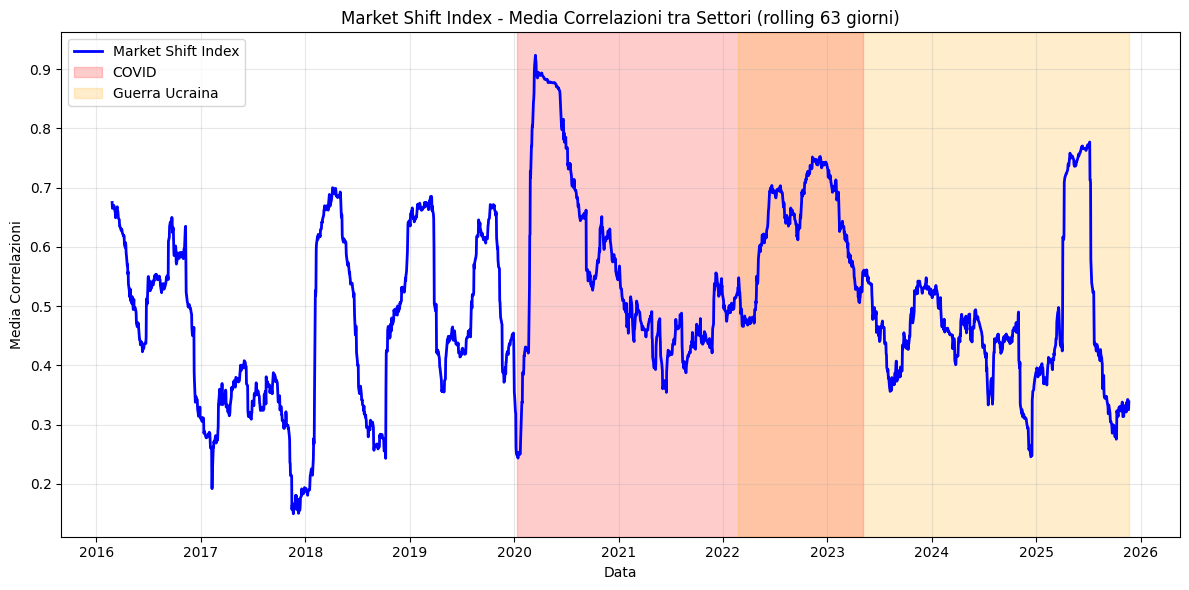

In [533]:
# Market Shift Index Plot
plt.figure(figsize=(12, 6))
plt.plot(msi_full, label="Market Shift Index", linewidth=2, color='blue')
plt.axvspan(covid_start, covid_end, alpha=0.2, color='red', label="COVID")
plt.axvspan(war_start, war_end, alpha=0.2, color='orange', label="Guerra Ucraina")
plt.title("Market Shift Index - Media Correlazioni tra Settori (rolling 63 giorni)")
plt.xlabel("Data")
plt.ylabel("Media Correlazioni")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

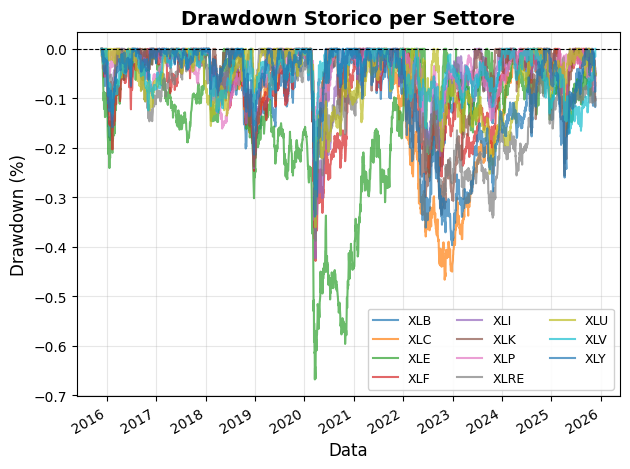

In [534]:
# Drawdown Plot - Historical drawdown for each sector
plt.figure(figsize=(12, 7))
dd_series.plot(alpha=0.7, linewidth=1.5)
plt.title("Drawdown Storico per Settore", fontsize=14, fontweight='bold')
plt.xlabel("Data", fontsize=12)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.legend(ncol=3, fontsize=9, loc='lower right', framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

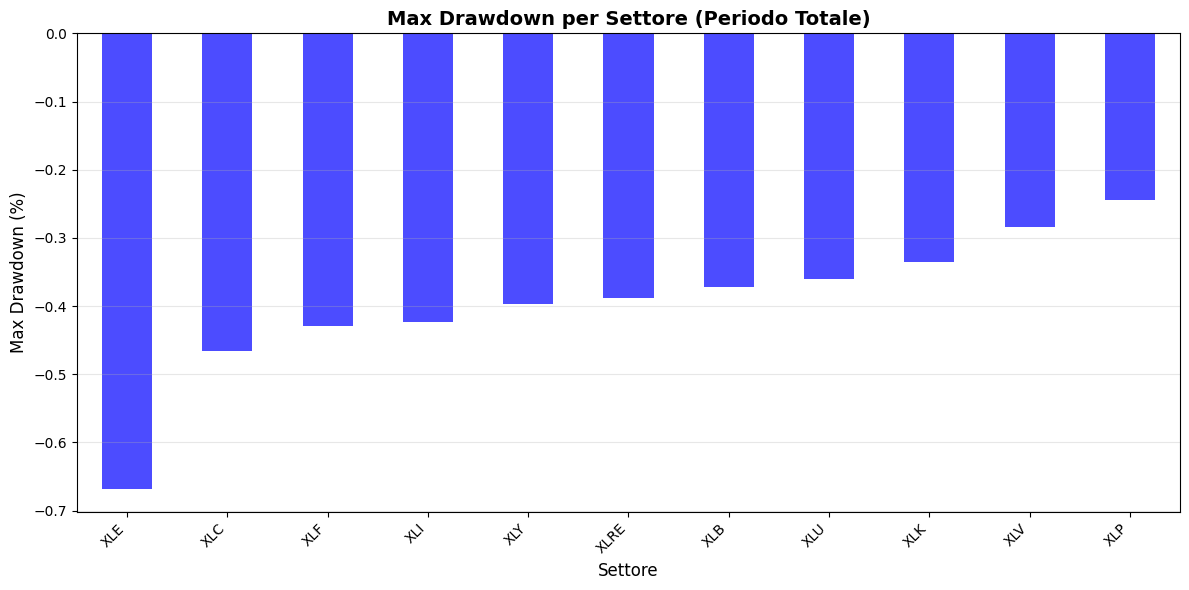

In [535]:
# Max Drawdown Plot - Maximum drawdown for each sector
plt.figure(figsize=(12, 6))
dd_max.sort_values().plot(kind='bar', color='blue', alpha=0.7)
plt.title("Max Drawdown per Settore (Periodo Totale)", fontsize=14, fontweight='bold')
plt.xlabel("Settore", fontsize=12)
plt.ylabel("Max Drawdown (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

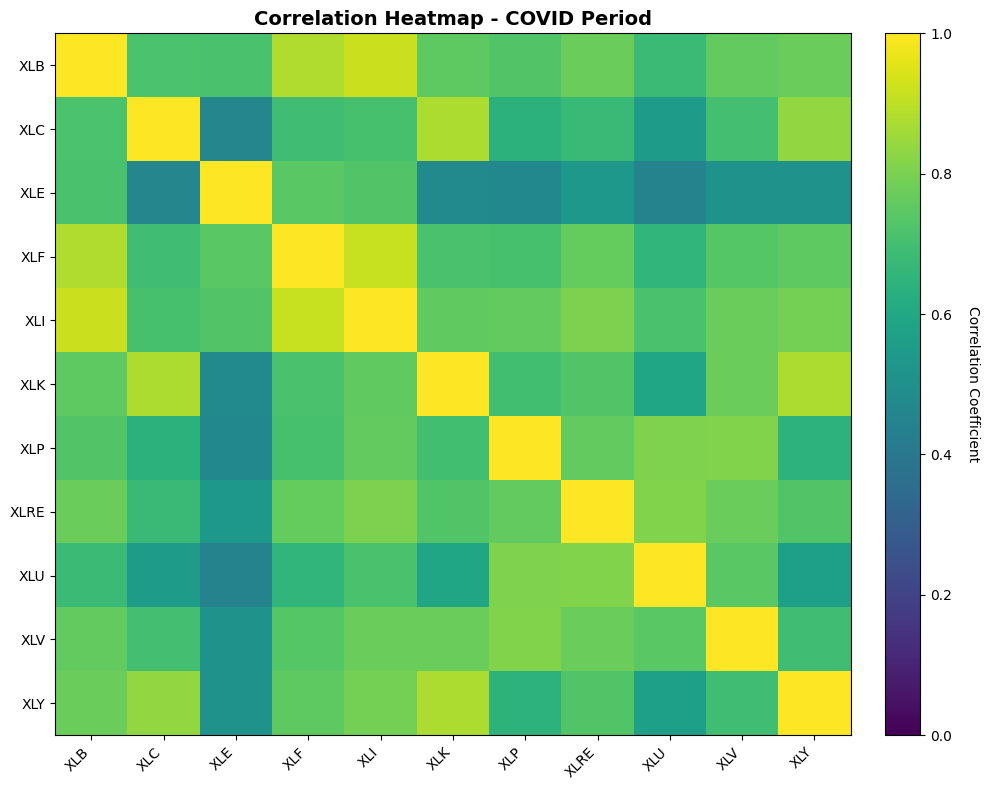

In [536]:
# Correlation Heatmap - COVID Period
corr_covid = returns_covid.corr()
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_covid.values, cmap='viridis', vmin=0, vmax=1, aspect='auto')
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
plt.xticks(range(len(corr_covid.columns)), corr_covid.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_covid.index)), corr_covid.index)
plt.title("Correlation Heatmap - COVID Period", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

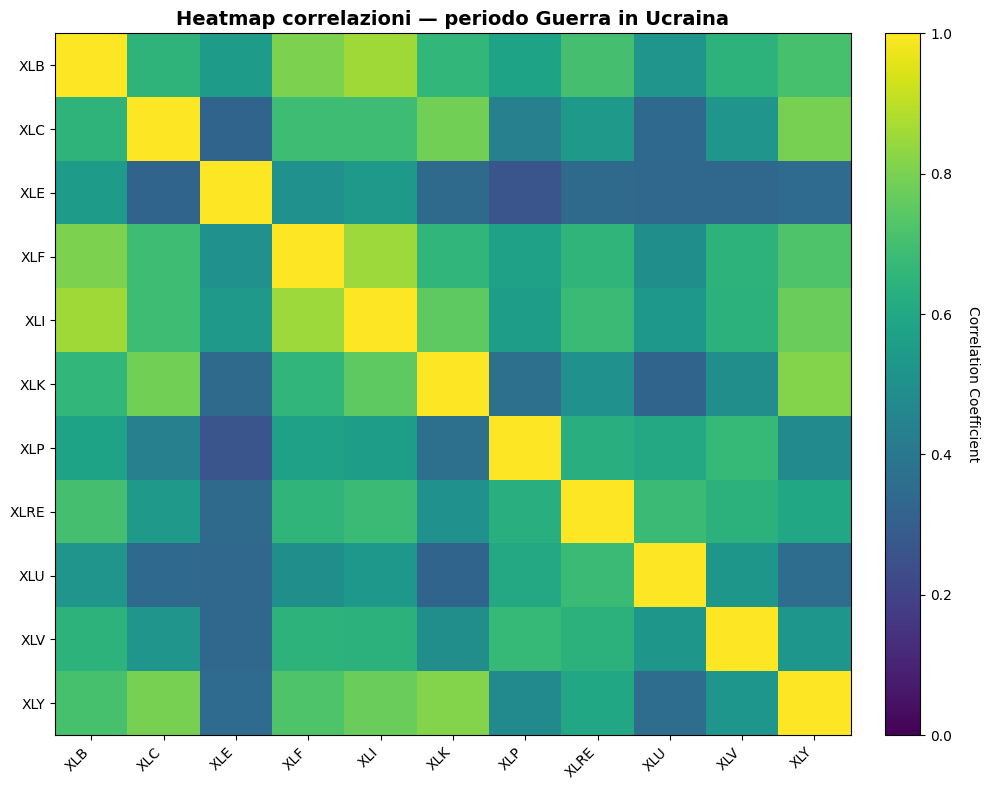

In [537]:
corr_war = returns_war.corr()
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_war.values, cmap='viridis', vmin=0, vmax=1, aspect='auto')
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
plt.xticks(range(len(corr_war.columns)), corr_war.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_war.index)), corr_war.index)
plt.title("Heatmap correlazioni — periodo Guerra in Ucraina", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()